In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [32]:
conda install -c conda-forge ta-lib

Channels:
 - conda-forge
 - rapidsai
 - nvidia
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [163]:
# Install libraries
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import mplfinance as mpf
import talib as ta
import matplotlib.pyplot as plt
import pandas_datareader as web

In [35]:
msft = yf.Ticker("MSFT")
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

In [137]:
df = msft.history(start="2022-01-01", end="2023-12-31")
df.info

<bound method DataFrame.info of                                  Open        High         Low       Close  \
Date                                                                        
2022-01-03 00:00:00-05:00  328.117155  330.709994  322.667282  327.530090   
2022-01-04 00:00:00-05:00  327.608392  327.970437  319.086257  321.913940   
2022-01-05 00:00:00-05:00  318.831821  319.037313  309.164938  309.556305   
2022-01-06 00:00:00-05:00  306.396024  311.826341  304.771823  307.110291   
2022-01-07 00:00:00-05:00  307.374398  309.673719  303.401966  307.266785   
...                               ...         ...         ...         ...   
2023-12-22 00:00:00-05:00  372.318678  373.813213  371.352210  373.215393   
2023-12-26 00:00:00-05:00  373.633893  375.566828  372.139358  373.295135   
2023-12-27 00:00:00-05:00  372.328655  373.693659  371.451856  372.707275   
2023-12-28 00:00:00-05:00  374.002510  375.088536  372.796927  373.912842   
2023-12-29 00:00:00-05:00  374.630212  375.7

### Simple Moving Average(SMA)

In [138]:
df['SMA_100'] = ta.SMA(df['Close'], 100)
df.iloc[100:]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_100
Date,,,,,,,,
2022-05-26 00:00:00-04:00,257.742895,262.499347,256.917398,261.310242,25002100,0.0,0.0,285.664141
2022-05-27 00:00:00-04:00,263.845683,268.621778,262.941550,268.523499,26910800,0.0,0.0,285.130236
2022-05-31 00:00:00-04:00,267.825766,270.027091,264.287900,267.177155,37827700,0.0,0.0,284.706445
2022-06-01 00:00:00-04:00,270.449694,272.896704,265.378759,267.717682,25292200,0.0,0.0,284.312519
2022-06-02 00:00:00-04:00,259.885245,269.909161,257.084434,269.840363,44008200,0.0,0.0,283.938254
...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,372.318678,373.813213,371.352210,373.215393,17091100,0.0,0.0,340.641385
2023-12-26 00:00:00-05:00,373.633893,375.566828,372.139358,373.295135,12673100,0.0,0.0,341.133091
2023-12-27 00:00:00-05:00,372.328655,373.693659,371.451856,372.707275,14905400,0.0,0.0,341.607806


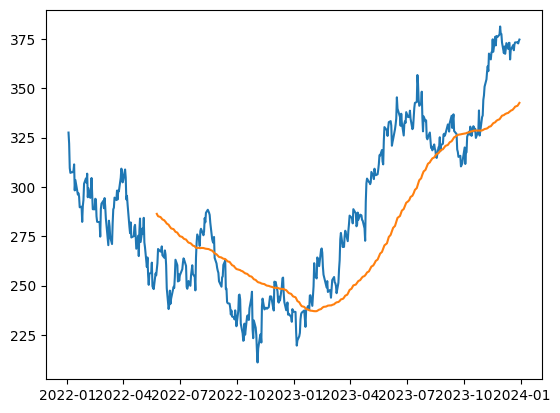

In [139]:
plt.plot(df['Close'])
plt.plot(df['SMA_100'])

### Exponential Moving Average(EMA)

In [140]:
df['EMA_100'] = ta.EMA(df['Close'], 100)
df.iloc[100:]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_100,EMA_100
Date,,,,,,,,,
2022-05-26 00:00:00-04:00,257.742895,262.499347,256.917398,261.310242,25002100,0.0,0.0,285.664141,285.830971
2022-05-27 00:00:00-04:00,263.845683,268.621778,262.941550,268.523499,26910800,0.0,0.0,285.130236,285.488249
2022-05-31 00:00:00-04:00,267.825766,270.027091,264.287900,267.177155,37827700,0.0,0.0,284.706445,285.125653
2022-06-01 00:00:00-04:00,270.449694,272.896704,265.378759,267.717682,25292200,0.0,0.0,284.312519,284.780940
2022-06-02 00:00:00-04:00,259.885245,269.909161,257.084434,269.840363,44008200,0.0,0.0,283.938254,284.485087
...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,372.318678,373.813213,371.352210,373.215393,17091100,0.0,0.0,340.641385,346.562027
2023-12-26 00:00:00-05:00,373.633893,375.566828,372.139358,373.295135,12673100,0.0,0.0,341.133091,347.091396
2023-12-27 00:00:00-05:00,372.328655,373.693659,371.451856,372.707275,14905400,0.0,0.0,341.607806,347.598641


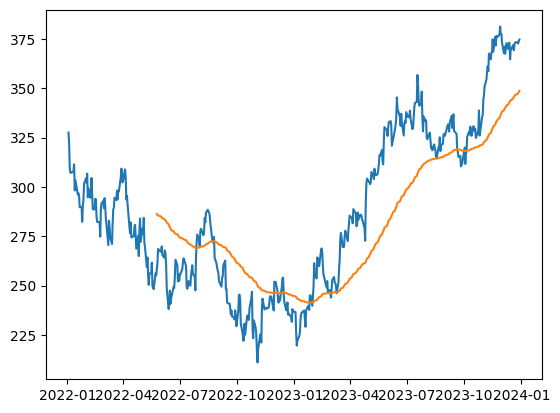

In [141]:
plt.plot(df['Close'])
plt.plot(df['EMA_100'])

<Axes: xlabel='Date'>

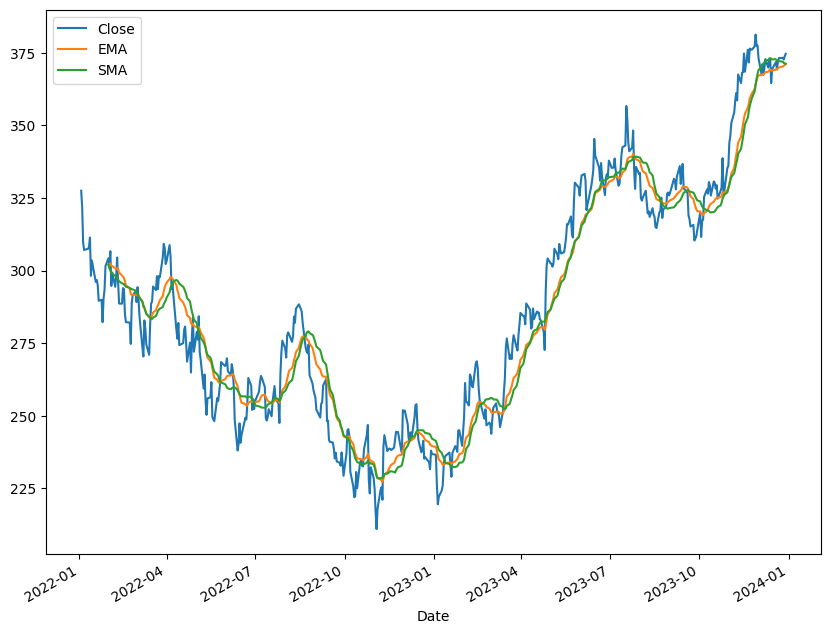

In [142]:
# SMA vs EMA
df['SMA'] = ta.SMA(df['Close'], timeperiod = 20)
df['EMA'] = ta.EMA(df['Close'], timeperiod = 20)
df[['Close','EMA','SMA']].plot(figsize=(10,8))

- The trend in EMA and SMA are almost identical

### Relative Strength Index(RSI)

In [143]:
df['RSI'] = ta.RSI(df['Close'])

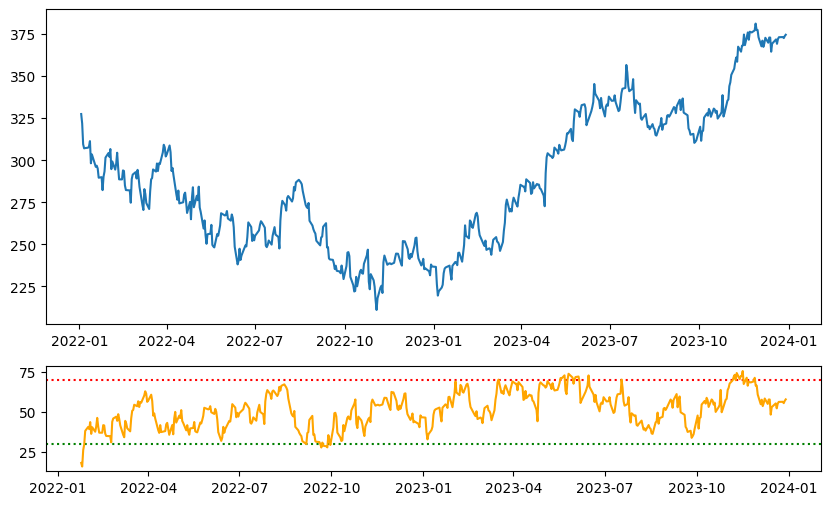

In [144]:
fig, axs = plt.subplots(2,1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(10,6))

axs[0].plot(df['Close'])
axs[1].axhline(y=70, color="r", linestyle=":")
axs[1].axhline(y=30, color="g", linestyle=":")
axs[1].plot(df['RSI'], color="orange")

### Bollinger Bands

In [146]:
df['up_band'], df['mid_band'], df['low_band'] = ta.BBANDS(df['Close'], 20)

<Axes: xlabel='Date'>

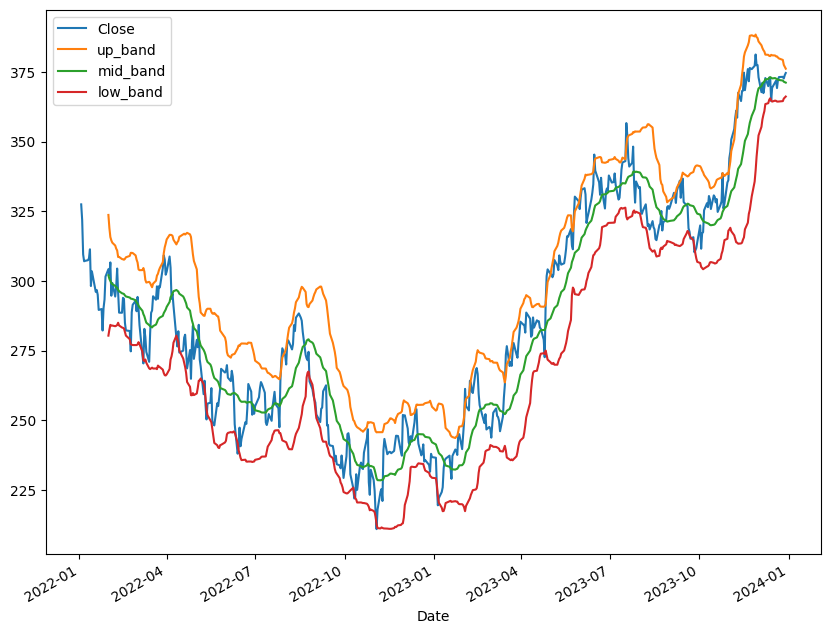

In [147]:
df[['Close', 'up_band', 'mid_band', 'low_band']].plot(figsize=(10,8))

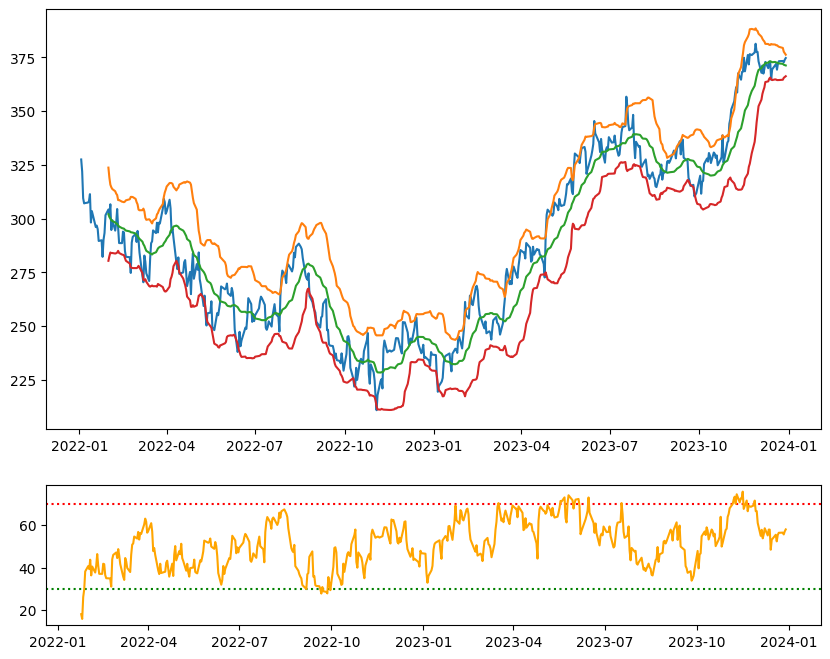

In [148]:
# RSI vs Bollinger Bands
fig, axs = plt.subplots(2,1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(10,8))

axs[0].plot(df[['Close', 'up_band', 'mid_band', 'low_band']])
axs[1].axhline(y=70, color="r", linestyle=":")
axs[1].axhline(y=30, color="g", linestyle=":")
axs[1].plot(df['RSI'], color="orange")

### Linear Regression

In [149]:
df['linear_regression'] = ta.LINEARREG(df['Close'], 200)

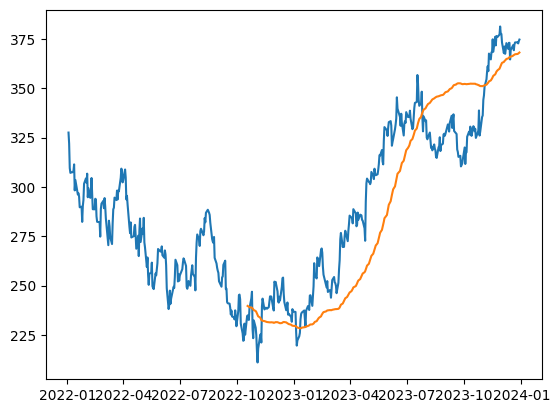

In [150]:
plt.plot(df['Close'])
plt.plot(df['linear_regression'])

### Moving Average Convergence Divergence(MACD)

In [151]:
macd, macd_signal, macd_hist = ta.MACD(df['Close'])

<BarContainer object of 501 artists>

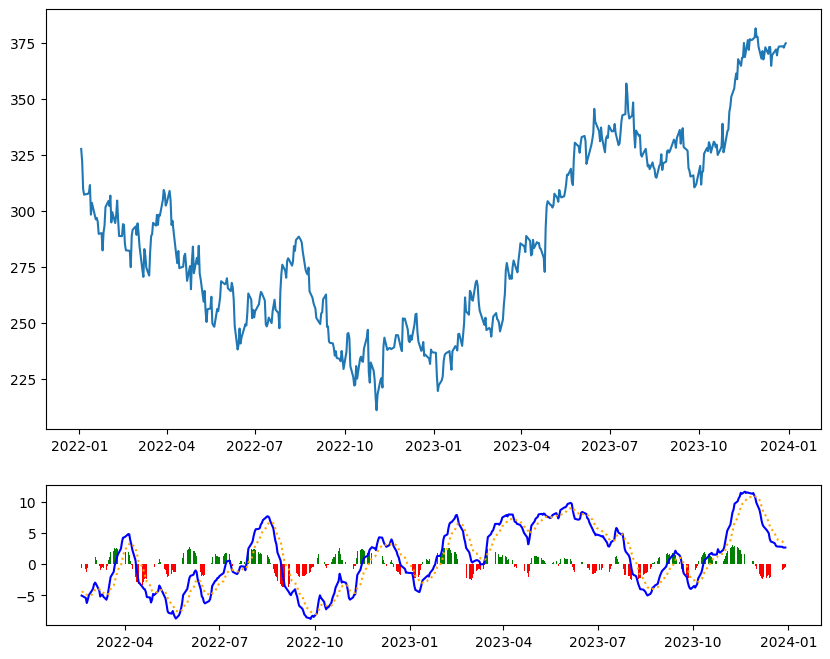

In [152]:
fig, axs = plt.subplots(2,1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(10,8))
c = ["red" if cl < 0 else "green" for cl in macd_hist]

axs[0].plot(df['Close'])
axs[1].plot(macd, 'b-')
axs[1].plot(macd_signal, ':', color="orange")
axs[1].bar(macd_hist.index, macd_hist, color=c)

- When macd is above the macd_signal you buy and if below, sell - if below red, buy and if above green, sell

### Engulfing Pattern

In [155]:
ta.get_function_groups()

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

In [158]:
?ta.CDLENGULFING

Signature: ta.CDLENGULFING(open, high, low, close)
Docstring:
CDLENGULFING(open, high, low, close)

Engulfing Pattern (Pattern Recognition)

Inputs:
    prices: ['open', 'high', 'low', 'close']
Outputs:
    integer (values are -100, 0 or 100)
Type:      function

In [159]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [167]:
df = aapl.history(start="2024-01-01", end="2024-06-01")

In [168]:
df['ENGULFING'] = ta.CDLENGULFING(df['Open'], df['High'], df['Low'], df['Close'])

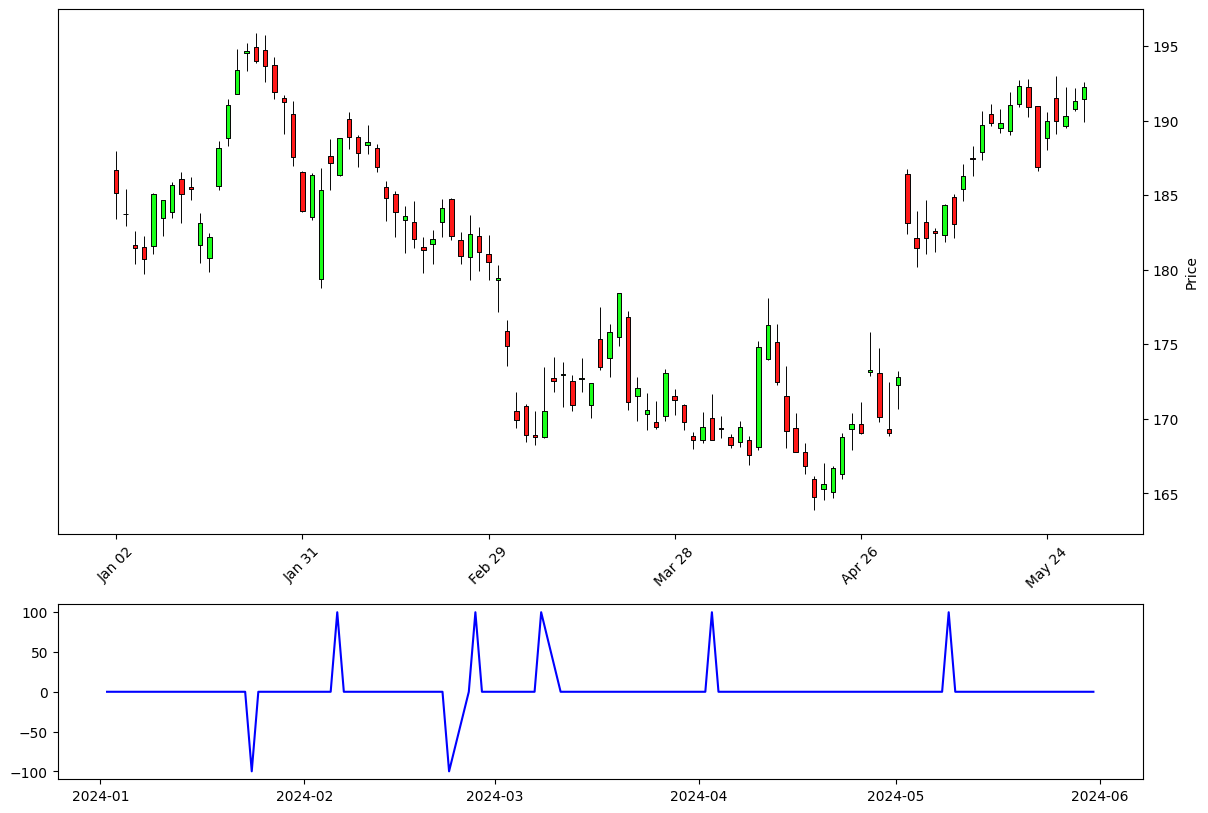

In [171]:
import mplfinance as mpf
fig, axs = plt.subplots(2,1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(14,10))

colors = mpf.make_marketcolors(up="#00ff00",
                              down="#ff0000")
mpf_style = mpf.make_mpf_style(base_mpf_style="yahoo", marketcolors=colors)

mpf.plot(df, type="candle", ax=axs[0], style=mpf_style)
axs[1].plot(df['ENGULFING'], color="blue")